In [27]:
#step 1 :- Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#step 2:- Load data
from sklearn.model_selection import train_test_split
(x_train ,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data(
    #path='fashion_mnist.npz',
    #test_split =0.2,
    #seed = 42,
)

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
#step 3:- Explore data
x_train.shape

(60000, 28, 28)

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

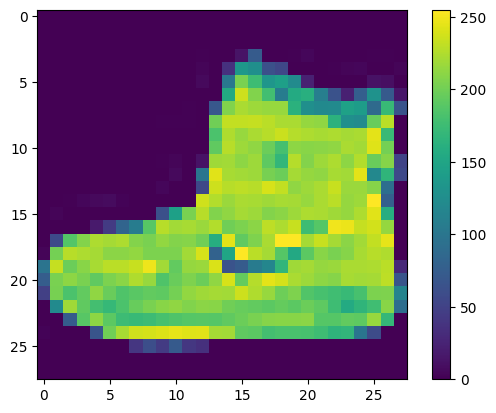

In [32]:
#step 4:- Preprocess the data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
x_train = x_train / 255.0

x_test = x_test / 255.0

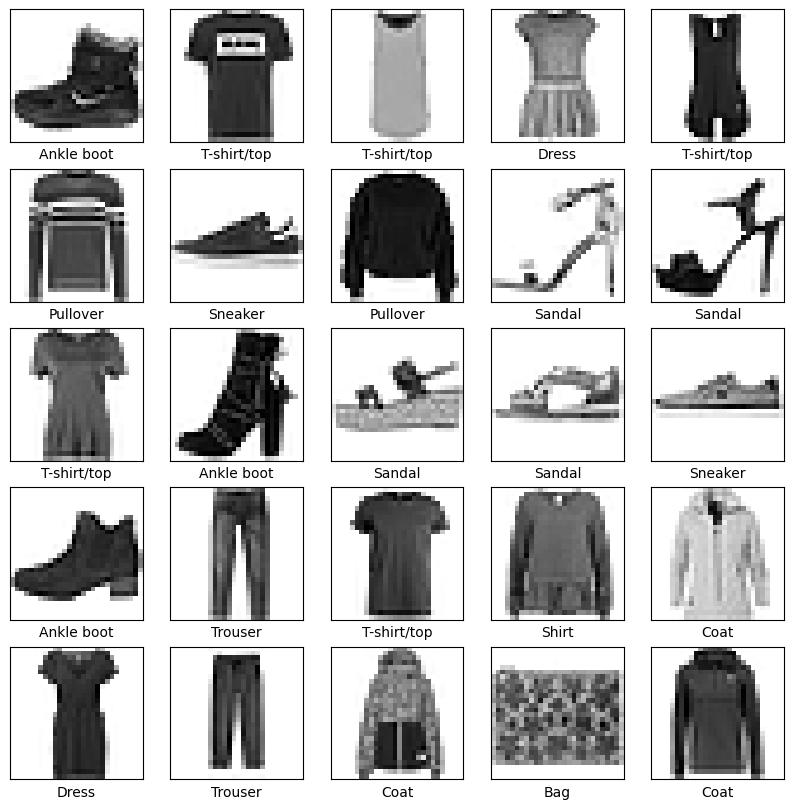

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [35]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [36]:
#step 5 :- Create the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical # Import to_categorical
#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compiling the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)
# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10) # Convert to one-hot
y_test = to_categorical(y_test, num_classes=10) # Convert to one-hot
y_val = to_categorical(y_val, num_classes=10)

#Train the model
history = model.fit(
  x_train,
  y_train,
  batch_size=32,
  epochs=30,
  validation_data=(x_val, y_val)
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6603 - loss: 1.1045 - val_accuracy: 0.8184 - val_loss: 0.5511
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8299 - loss: 0.5167 - val_accuracy: 0.8373 - val_loss: 0.4734
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8454 - loss: 0.4538 - val_accuracy: 0.8442 - val_loss: 0.4438
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8578 - loss: 0.4150 - val_accuracy: 0.8529 - val_loss: 0.4174
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8626 - loss: 0.4002 - val_accuracy: 0.8572 - val_loss: 0.4059
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8684 - loss: 0.3815 - val_accuracy: 0.8651 - val_loss: 0.3895
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8689 - loss: 0.3748 - val_accuracy: 0.8643 - val_loss: 0.3888
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8734 - loss: 0.36

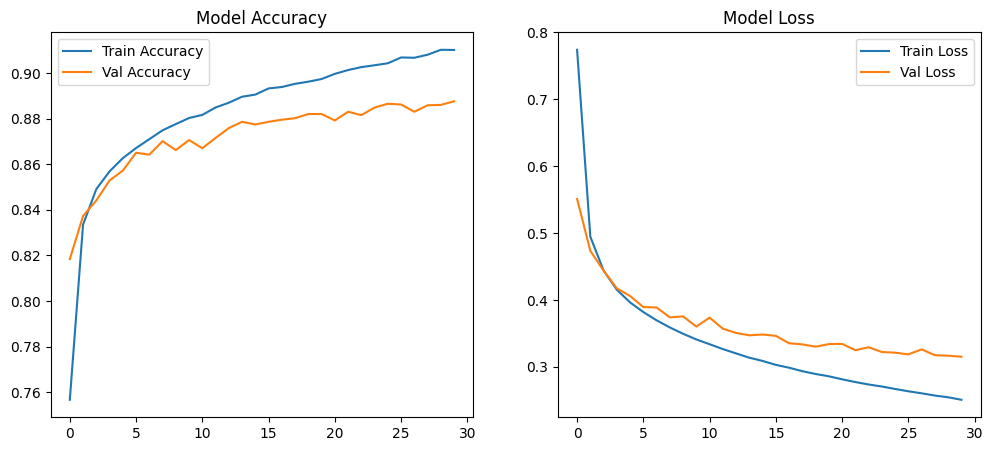

In [37]:
# Step 6:-Plot accuracy & loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

In [38]:
#step 7 :- Model Prediction
y_pred = model.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.7076183e-06, 9.8578710e-08, 2.0476129e-05, 6.0639813e-06,
       6.6504349e-06, 2.5011227e-02, 5.1501684e-05, 4.7014594e-02,
       1.3839287e-03, 9.2650276e-01], dtype=float32)